In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
%%time
path = 'models/linear_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(656)))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                13140     
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 14,001
Trainable params: 14,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 0.1221 - val_loss: 0.0378
Epoch 2/100
1266/1266 [==============================] - 1s 1ms/step - loss: 0.

INFO:tensorflow:Assets written to: models/linear_reg\assets


INFO:tensorflow:Assets written to: models/linear_reg\assets


CPU times: total: 46.3 s
Wall time: 2min 27s


In [7]:
pd.DataFrame(history.history).to_csv('output/history_mlp_linear.csv')

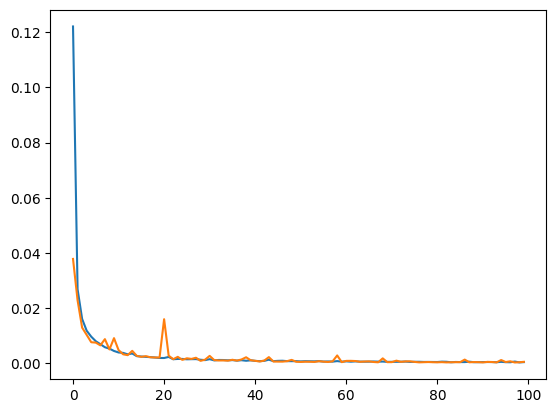

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [9]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 845us/step


In [10]:
mean_absolute_percentage_error(y_test, pred)

0.09750316539895215

<h3>R2</h3>

In [11]:
r2_score(y_test, pred)

0.9939884847666519

<h3>Cosine Similarity</h3>

In [12]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.9992771]


<h3>Visualization</h3>

In [13]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

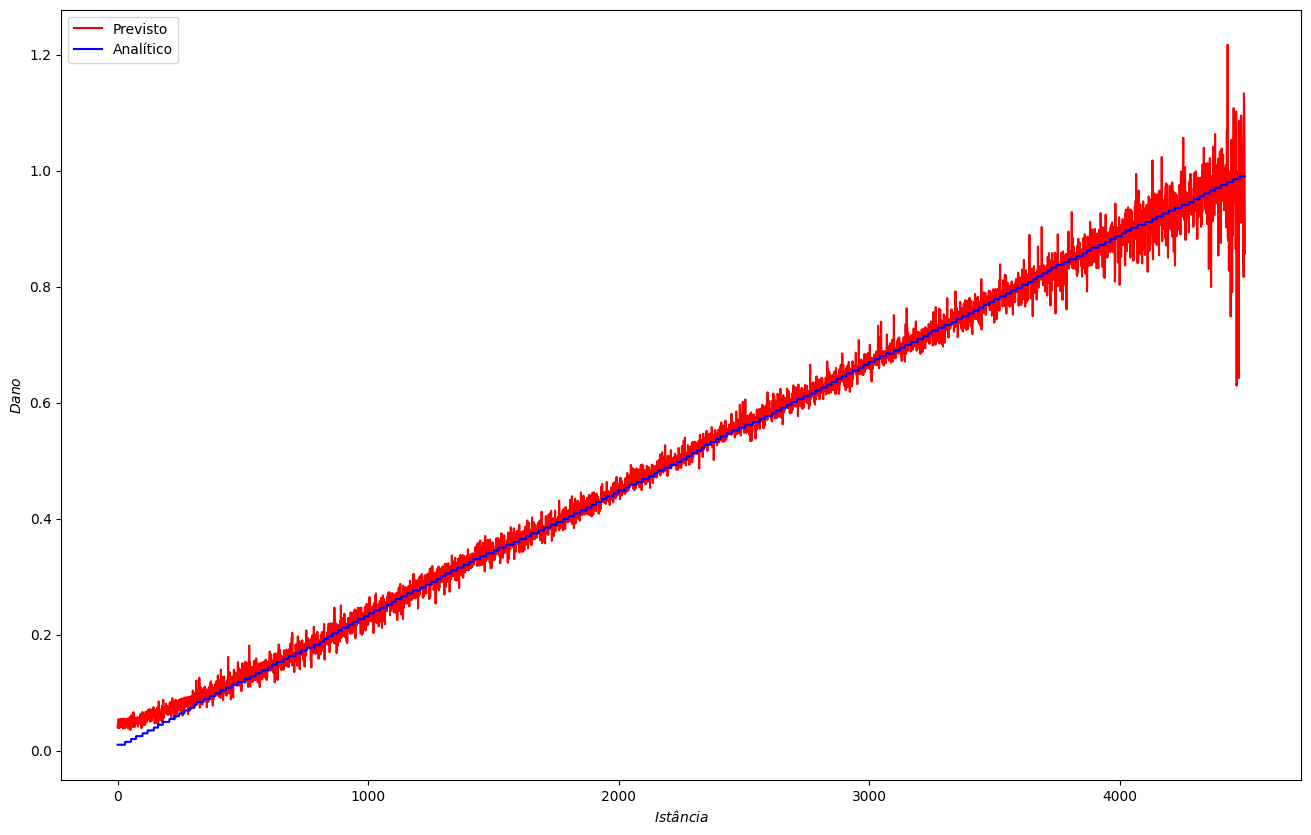

In [14]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [15]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['damage'], axis=1), df_exp['damage'], test_size=0.10, random_state=41)

In [17]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
%%time
path = 'models/exp_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(656)))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                13140     
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 14,001
Trainable params: 14,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 0.1513 - val_loss: 0.0448
Epoch 2/100
1266/1266 [==============================] - 1s 1ms/step - loss: 0.

INFO:tensorflow:Assets written to: models/exp_reg\assets


INFO:tensorflow:Assets written to: models/exp_reg\assets


CPU times: total: 46.2 s
Wall time: 2min 37s


In [19]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 822us/step


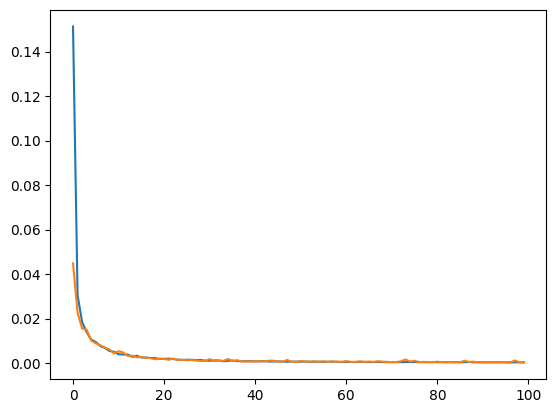

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [21]:
mean_absolute_percentage_error(y_test, pred)

0.04037423176223936

<h3>R2</h3>

In [22]:
r2_score(y_test, pred)

0.9960532203023348

<h3>Cosine Similarity</h3>

In [23]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.99973187]


<h3>Visualization</h3>

In [24]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

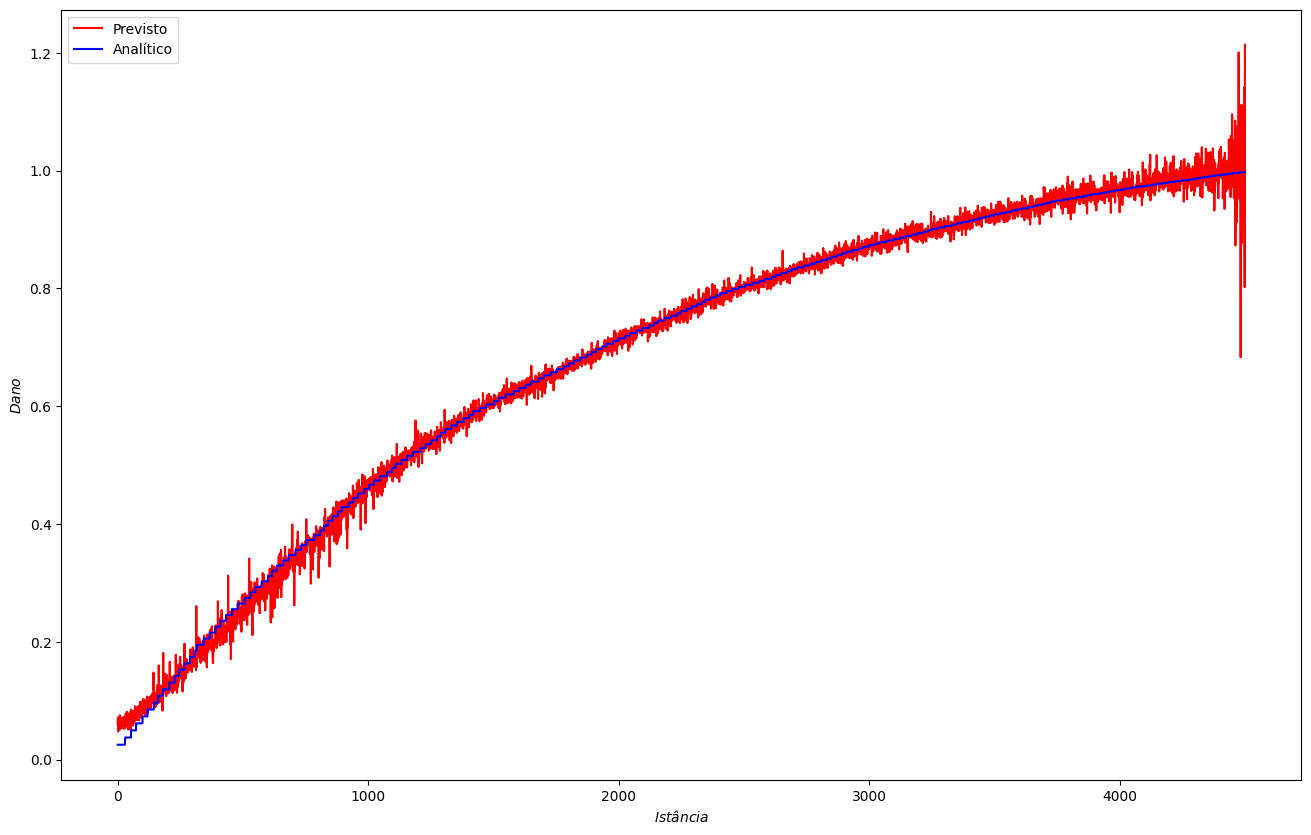

In [25]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [26]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['damage'], axis=1), df_sig['damage'], test_size=0.10, random_state=41)

In [38]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
%%time
path = 'models/sig_reg'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(656)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                52560     
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dense_18 (Dense)            (None, 80)                6480      
                                                                 
 dense_19 (Dense)            (None, 1)                 81        
                                                                 
Total params: 65,601
Trainable params: 65,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1266/1266 [==============================] - 2s 1ms/step - loss: 0.2079 - val_loss: 0.0879
Epoch 2/300
1266/1266 [==============================] - 2s 1ms/step - loss: 0.

INFO:tensorflow:Assets written to: models/sig_reg\assets


INFO:tensorflow:Assets written to: models/sig_reg\assets


CPU times: total: 2min 36s
Wall time: 9min 49s


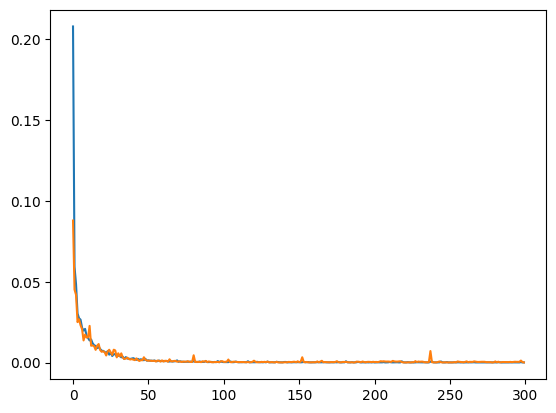

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [41]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 984us/step


<h3>MAPE</h3>

In [49]:
mean_absolute_percentage_error(y_test, pred)

2.1428297998652583

<h3>R2</h3>

In [43]:
r2_score(y_test, pred)

0.9993234790879205

<h3>Cosine Similarity</h3>

In [44]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.9998793]


<h3>Visualization</h3>

In [45]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\rf_linear_reg.csv', index=False)

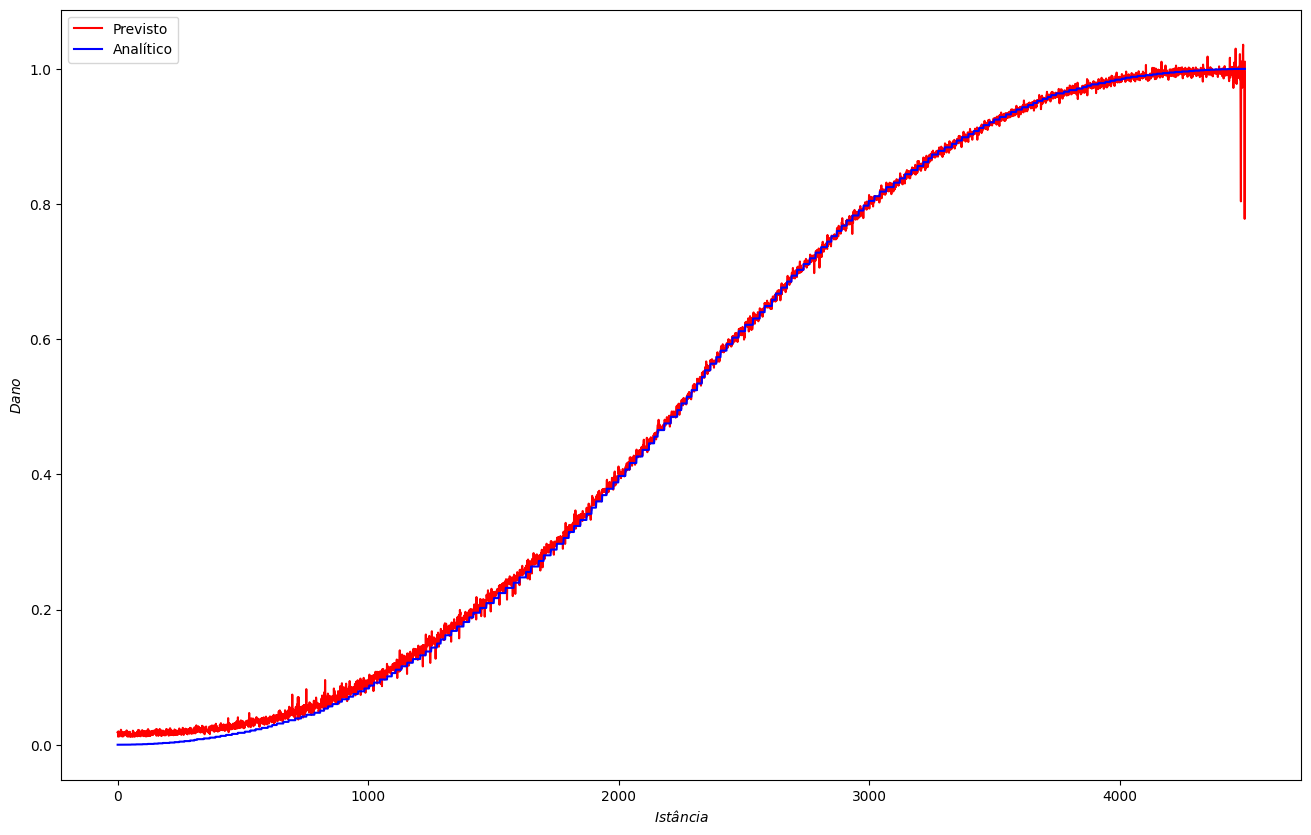

In [46]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()